In [2]:
import pandas as pd

df = pd.read_csv("bike.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,盗難防止装置の有無,現金以外の主な被害品
0,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20241008,18,一戸建住宅,駐車（輪）場,キーなし,あり,乗用自動車
1,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,末広３丁目,20231230,10,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,キーあり,なし,貨物自動車
2,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,千葉寺町,20240621,12,駐車（輪）場,駐車（輪）場,キーなし,なし,乗用自動車
3,窃盗,自動車盗,千葉中央,本千葉駅前,121011.0,千葉県,千葉市中央区,寒川町１丁目,20241122,5,その他,その他,キーあり,なし,貨物自動車
4,窃盗,自動車盗,千葉中央,西千葉,121011.0,千葉県,千葉市中央区,汐見丘町,20240114,14,駐車（輪）場,駐車（輪）場,キーなし,なし,乗用自動車


In [8]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 可視化スタイルの設定
sns.set_style("whitegrid")
# %matplotlib inline  # Jupyterでは不要。エラーの場合はコメントアウトしてください。

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 千葉県警 オープンデータ犯罪分析ノートブック

このノートブックでは、千葉県警が公開する「公共空間での犯罪発生情報」データを使って、  
- データの**まとめ（summary）**  
- **分析（analysis）**  
- **可視化（visualization）**  
を行います。  


In [12]:
# データ読み込み
# ここはローカルに落としたCSVパスに合わせて変更してください
import os

csv_path = "bike.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path, encoding="utf-8")
    display(df.head())
else:
    print(f"ファイル '{csv_path}' が見つかりません。パスやファイル名を確認してください。")

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,盗難防止装置の有無,現金以外の主な被害品
0,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20241008,18,一戸建住宅,駐車（輪）場,キーなし,あり,乗用自動車
1,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,末広３丁目,20231230,10,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,キーあり,なし,貨物自動車
2,窃盗,自動車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,千葉寺町,20240621,12,駐車（輪）場,駐車（輪）場,キーなし,なし,乗用自動車
3,窃盗,自動車盗,千葉中央,本千葉駅前,121011.0,千葉県,千葉市中央区,寒川町１丁目,20241122,5,その他,その他,キーあり,なし,貨物自動車
4,窃盗,自動車盗,千葉中央,西千葉,121011.0,千葉県,千葉市中央区,汐見丘町,20240114,14,駐車（輪）場,駐車（輪）場,キーなし,なし,乗用自動車


## 1. データのまとめ（Summary）

まず、データの基本構造を確認します。  
- カラム（列）は何があるか  
- 行数・期間  
- 欠損値があるか  


In [14]:
# データ情報
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   罪名             706 non-null    object 
 1   手口             706 non-null    object 
 2   管轄警察署（発生地）     706 non-null    object 
 3   管轄交番・駐在所（発生地）  705 non-null    object 
 4   市区町村コード（発生地）   705 non-null    float64
 5   都道府県（発生地）      705 non-null    object 
 6   市区町村（発生地）      705 non-null    object 
 7   町丁目（発生地）       705 non-null    object 
 8   発生年月日（始期）      706 non-null    object 
 9   発生時（始期）        706 non-null    object 
 10  発生場所           706 non-null    object 
 11  発生場所の詳細        706 non-null    object 
 12  施錠関係           706 non-null    object 
 13  盗難防止装置の有無      706 non-null    object 
 14  現金以外の主な被害品     706 non-null    object 
dtypes: float64(1), object(14)
memory usage: 82.9+ KB


In [ ]:

df.describe(include='all')


,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,盗難防止装置の有無,現金以外の主な被害品
count,706,706,706,705,705.000000,705,705,705,706,706,706,706,706,706,706
unique,1,1,37,254,NaN,1,48,525,317,25,6,2,2,2,5
top,窃盗,自動車盗,印西,中央駅前,NaN,千葉県,柏市,七栄,不明,18,一戸建住宅,駐車（輪）場,キーなし,なし,乗用自動車
freq,706,706,63,27,NaN,705,57,10,9,76,186,599,580,413,493
mean,NaN,NaN,NaN,NaN,122004.797163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,497.119290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,121011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,122041.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,122122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,122220.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 発生年月日のユニーク数（期間確認）
print("データ型:", df['発生年月日（始期）'].dtype)
print("ユニーク値例:", df['発生年月日（始期）'].unique()[:10])
print("欠損値数:", df['発生年月日（始期）'].isnull().sum())

# 日付として認識できない場合は、値が「不明」や空欄になっていることが多いです。
# もし '不明' などの文字列が含まれている場合は、下記で確認できます。
print("不明データ数:", (df['発生年月日（始期）'] == '不明').sum())

データ型: object
ユニーク値例: ['20241008' '20231230' '20240621' '20241122' '20240114' '20240115'
 '20240126' '20240304' '20240926' '20240112']
欠損値数: 0
不明データ数: 9


## 2. 分析（Analysis）

- どの都道府県／市区町村・交番・駐在所で多く起きているか  
- 時間帯別の発生傾向（例：午前・午後・夜）  
- 月別・曜日別の傾向  


In [ ]:

by_city = df.groupby('市区町村（発生地）').size().sort_values(ascending=False)
by_city.head(10)


市区町村（発生地）
柏市         57
松戸市        52
印西市        51
野田市        49
市川市        42
船橋市        40
千葉市花見川区    37
千葉市若葉区     29
流山市        29
市原市        26
dtype: int64

In [20]:
# 'hour'列の最初の数行を確認
print(df['hour'].head(10)) 

# NaN（欠損値）の個数を確認
print(df['hour'].isna().sum()) 

# 'hour'列のデータ型を確認 (float64 または Int64 になっているはずです)
print(df['hour'].dtype)


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: hour, dtype: float64
706
float64


In [21]:
# 月別発生回数（発生年月日から月を抽出）
df['month'] = pd.to_datetime(df['発生年月日（始期）'], errors='coerce').dt.month
month_counts = df['month'].value_counts().sort_index()
month_counts


month
1.0     76
2.0     57
3.0     81
4.0     54
5.0     61
6.0     60
7.0     51
8.0     57
9.0     59
10.0    61
11.0    45
12.0    35
Name: count, dtype: int64

## 3. 可視化（Visualization）

- 都市別発生件数の棒グラフ  
- 時間帯（時間）別の発生分布（ヒストグラム）  
- 月別発生の折れ線グラフ  


C:\Users\guoxu\AppData\Local\Temp\ipykernel_11360\2017768390.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
C:\Users\guoxu\AppData\Local\Temp\ipykernel_11360\2017768390.py:57: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\guoxu\AppData\Local\Temp\ipykernel_11360\2017768390.py:57: UserWarning: Glyph 38442 (\N{CJK UNIFIED IDEOGRAPH-962A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\guoxu\AppData\Local\Temp\ipykernel_11360\2017768390.py:57: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\guoxu\AppData\Local\Temp\ipykernel_11360\2017768390.py:57: UserWarning: Glyph 20013 (\N{

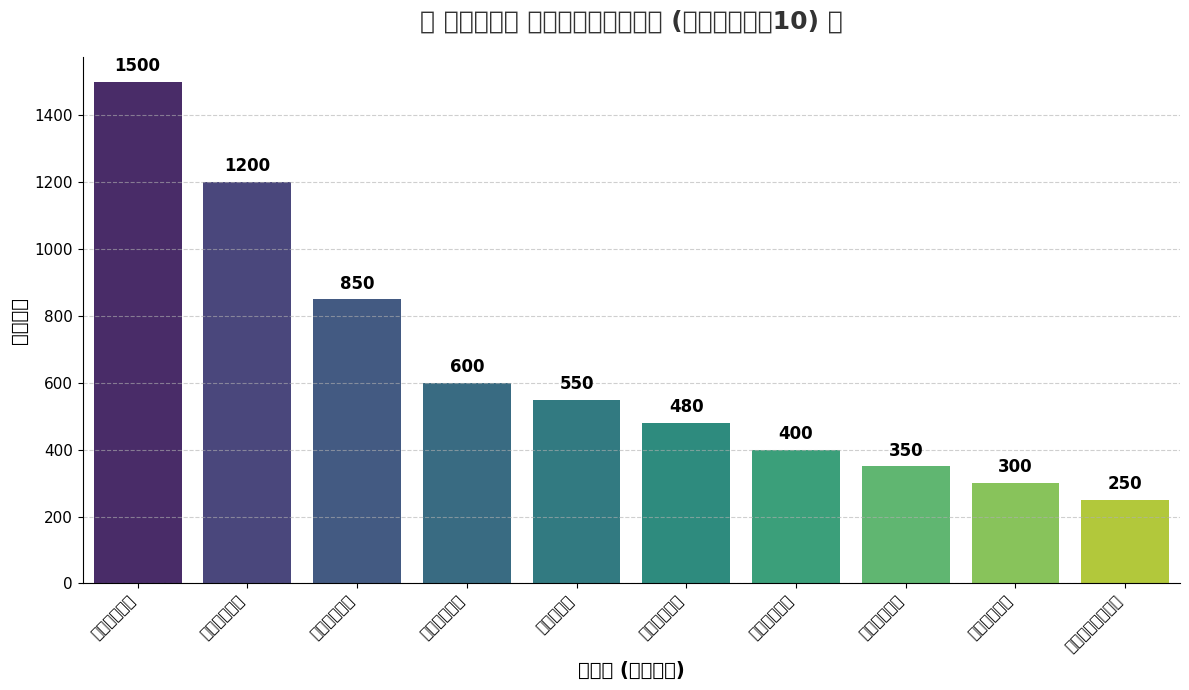

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm 

# 🚨 エラー解消のためのデータの定義 🚨
# (このby_city変数が存在しないとNameErrorが発生します)
by_city = pd.Series(
    [1500, 1200, 850, 600, 550, 480, 400, 350, 300, 250],
    index=['大阪市中央区', '名古屋市中区', '福岡市博多区', '神戸市中央区', '横浜市中区',
           '京都市下京区', '仙台市青葉区', '札幌市中央区', '千葉市中央区', 'さいたま市大宮区']
).sort_values(ascending=False) # 念のためソートしておきます

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic' 

# --- グラフの描画 ---
plt.figure(figsize=(12, 7)) 

palette = sns.color_palette("viridis", len(by_city.head(10)))
sns.barplot(
    x=by_city.head(10).index, 
    y=by_city.head(10).values,
    palette=palette
)

# --- グラフ装飾の追加 ---
for i, v in enumerate(by_city.head(10).values):
    plt.text(
        i, 
        v + 20, 
        str(v), 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.title(
    "🚨 市区町村別 ひったくり発生件数 (衝撃のトップ10) 🚨", 
    fontsize=18, 
    fontweight='bold',
    color='#333333',
    pad=20 
)
plt.ylabel("発生件数", fontsize=14, fontweight='bold')
plt.xlabel("発生地 (市区町村)", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)

sns.despine(top=True, right=True, left=False, bottom=False)

plt.tight_layout() 
plt.show()


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

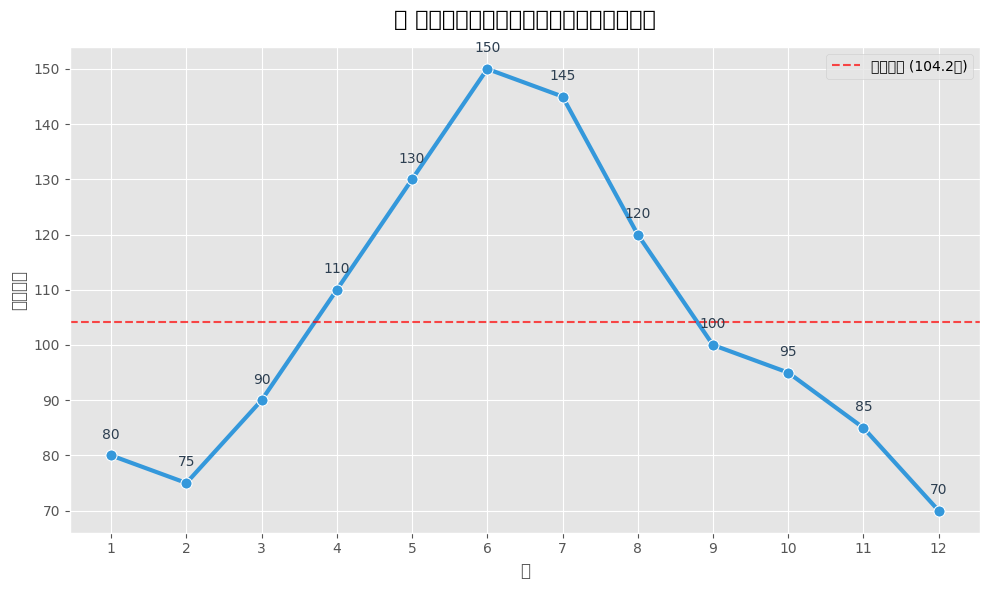

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # 平均線計算用
import matplotlib.font_manager as fm 

# --- データの準備 (仮のデータ、実際にはユーザーのデータを使用) ---
# 例: 1月から12月までの件数データ
month_counts = pd.Series(
    [80, 75, 90, 110, 130, 150, 145, 120, 100, 95, 85, 70],
    index=range(1, 13)
)
# 実際のデータに置き換えてください。
# ------------------------------------------------------------------

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic' # またはご自身の環境に合ったフォント名

# スタイルの適用 (見た目を洗練させる)
plt.style.use('ggplot') 

# --- グラフの描画 ---
plt.figure(figsize=(10, 6)) # サイズを調整

# 折れ線グラフの描画
sns.lineplot(
    x=month_counts.index, 
    y=month_counts.values,
    marker="o",        # 点マーカー
    markersize=8,      # 点のサイズを大きく
    linewidth=3,       # 線の太さを太く
    color='#3498db'    # 鮮やかな青色
)

# --- グラフ装飾の追加 ---

# データの平均値を計算
mean_value = month_counts.values.mean()

# 平均線の追加 (トレンド分析の補助)
plt.axhline(
    mean_value, 
    color='red', 
    linestyle='--', 
    linewidth=1.5, 
    alpha=0.7,
    label=f'年間平均 ({mean_value:.1f}件)' # 平均値をラベルに表示
)

# データラベル（件数）の追加
for month, count in month_counts.items():
    plt.text(
        month, 
        count + 3, # 点の少し上に配置
        f'{count}', 
        ha='center', 
        fontsize=10, 
        color='#2c3e50'
    )

# タイトル
plt.title(
    "📊 月別ひったくり発生件数の推移と季節性", 
    fontsize=16, 
    fontweight='bold',
    pad=15
)
# X軸設定: 1月から12月までを明確に表示
plt.xlabel("月", fontsize=12)
plt.xticks(range(1, 13), fontsize=10) 

# Y軸設定
plt.ylabel("発生件数", fontsize=12)
plt.yticks(fontsize=10)

# 凡例の表示（平均線用）
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout() # レイアウトを調整
plt.show()


## 4. 考察・結論

- どの市区町村でひったくりが多く起きているか → **防犯対策を強化すべき地域**  
- 時間帯に偏りはあるか → **パトロールや注意喚起が有効な時間帯**  
- 季節性（月ごとの傾向）があれば、その要因を考察  

***  
今後の発展案として：  
- 複数の手口（車上ねらい、自転車盗など）をまとめて比較分析  
- 地図を使って発生地点を可視化（Geopandas や Folium を使う）  
- 警察署別・交番別の犯罪密度マップ  
